# Bubble Distribution Analysis

This script mainly for bubble size and it's distribution.

Author: Schuetzen J.

Data July 23 2024

## Prepare data

Aim -> Read all mat data in the folder "ShadowImage", each folder data has a variable to save, the variable name use the seepname + dataname to identify.

In [1]:
import scipy.io as sio
from scipy.stats import gaussian_kde, norm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import os

# Define the directory base path
base_path = 'ShadowImage/'

# Lists to define the directory structure patterns
#seepname = ["1", "2","2C","3"]
seepname = ["1","2C","3"]
levels = ["0m","2m","5m","10m","20m"]
#levels = ["0m","2m","5m","20m"]
data = {}

# Loop through each combination of seepname and dataname
for seep in seepname:
    for level in levels:
        # Construct the pattern to match the files
        pattern = f"{base_path}Shadow-S{seep}-{level}/*.mat"
        
        # Find all files that match the pattern
        files = glob.glob(pattern)
        
        # # Skip processing if no files are found
        # if not files:
        #     print(f"No files found for pattern {pattern}. Skipping...")
        #     continue
        
        all_diameters = []
        # Load each file and append the bubble diameter data
        for file_path in files:
            mat_contents = sio.loadmat(file_path)
            # Assume 'bubble_diameter' is stored in 'imgInfo' within the MAT file
            bubble_diameter = mat_contents['imgInfo']['bubble_diameter'].flatten()
            all_diameters.extend(bubble_diameter)
        
        # Use a key for the data dictionary based on seep and data_name
        key = f"S{seep}_{level}"
        globals()[key] = all_diameters


Function: PDF data

In [4]:
import numpy as np

# Example data loading and processing
# Assuming 'loaddata' is defined and contains your lists of diameters
data = np.concatenate([diameter for sublist in loaddata for diameter in sublist])

# Define the size of each bin
bin_size = 1.0

# Calculate the number of bins required based on the range of data and bin size
range_of_data = max(data) - min(data)
number_of_bins = int(np.ceil(range_of_data / bin_size))

# Calculate PDF data
def pdf_data(data, num_bins):
    # Sort data for cumulative calculations
    diameter_sort = np.sort(data)

    # Calculate the raw CDF using the sorted data
    cdf_population_raw = np.cumsum(diameter_sort)
    
    # Calculate the raw PDF from the gradient of the CDF
    pdf_population_raw = np.gradient(cdf_population_raw, diameter_sort)
    
    # Binning for population
    diameter_population_bin = np.linspace(min(data), max(data), num_bins + 1)
    cdf_population_bin = np.array([np.sum(data <= x) for x in diameter_population_bin])
    pdf_population_bin = np.gradient(cdf_population_bin, diameter_population_bin)
    
    return pdf_population_bin

results = pdf_data(data.flatten(), number_of_bins)


c:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\function_base.py:1242: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\function_base.py:1242: RuntimeWarning: invalid value encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\function_base.py:1243: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
c:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\function_base.py:1243: RuntimeWarning: invalid value encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
c:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\function_base.py:1244: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
c:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\function_base.py:1244: RuntimeWarning: invalid value encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
c:\ProgramData\anaconda3\Lib\site-p

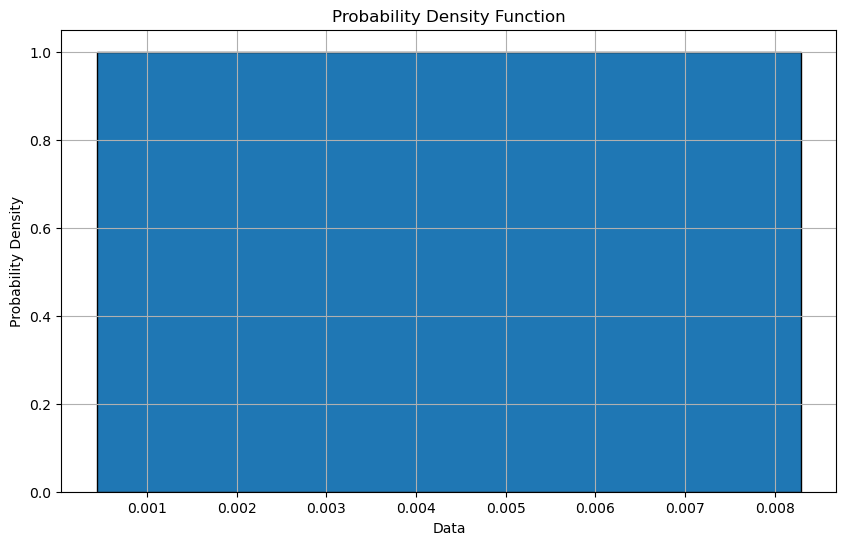

In [5]:
try:
    loaddata = globals()['S1_0m']
    data = np.concatenate([diameter for sublist in loaddata for diameter in sublist])
    
    # Calculate the number of bins
    bin_size = 1.0
    range_of_data = max(data) - min(data)
    number_of_bins = int(np.ceil(range_of_data / bin_size))

    def pdf_data(data, num_bins):
        histogram, bin_edges = np.histogram(data, bins=num_bins, density=True)
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
        pdf = histogram * np.diff(bin_edges)  # Normalize the histogram
        return bin_centers, pdf, bin_edges

    bin_centers, results, bin_edges = pdf_data(data, number_of_bins)

    plt.figure(figsize=(10, 6))
    plt.bar(bin_centers, results, width=np.diff(bin_edges), edgecolor='k', align='center')
    plt.xlabel('Data')
    plt.ylabel('Probability Density')
    plt.title('Probability Density Function')
    plt.grid(True)
    plt.show()

except KeyError:
    print("Error: 'S1_0m' not found in global variables.")
except Exception as e:
    print(f"An error occurred: {e}")

## S1 - 0m

Draw the Bubble scatter map for all frames (for statistic)

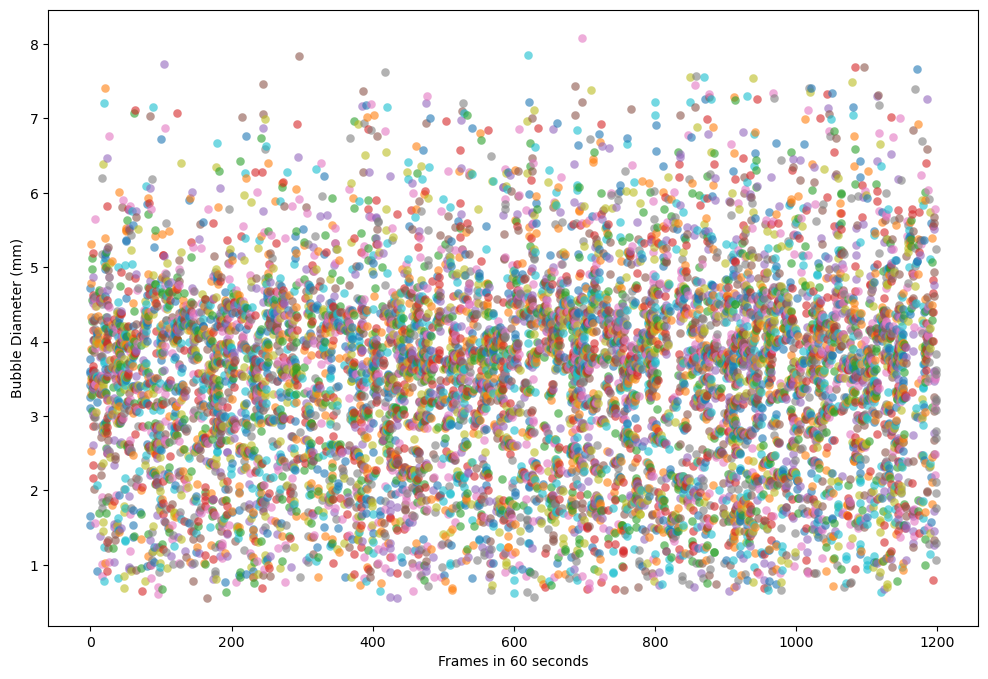

In [6]:
mat_contents = sio.loadmat('ShadowImage/Shadow-S1-0m/2024-05-24_01-11-31_Bubble_Info.mat')
bubble_diameter1 = mat_contents['imgInfo']['bubble_diameter'].flatten()


# mat_contents = sio.loadmat('ShadowImage/Shadow-S1-0m/2024-05-24_01-14-41_Bubble_Info.mat')
# bubble_diameter2 = mat_contents['imgInfo']['bubble_diameter'].flatten()


# mat_contents = sio.loadmat('ShadowImage/Shadow-S1-0m/2024-05-24_01-16-57_Bubble_Info.mat')
# bubble_diameter3 = mat_contents['imgInfo']['bubble_diameter'].flatten()

x_data = []
y_data = []
for index, bubble_list in enumerate(bubble_diameter1 * 1000):
    x_data.extend([index] * len(bubble_list))  
    y_data.extend(bubble_list)  

plt.figure(figsize=(12, 8))  
for i in x_data:
    if i == 1199:
        break
    x = np.full_like(y_data[i], i)  # 生成和y_data[i]
    plt.scatter(x, y_data[i], alpha=0.6,linewidths=0.1)  # alpha设置点的透明度

#plt.title('Scatter Plot of Bubble Diameters for S1 0m')
plt.xlabel('Frames in 60 seconds')
plt.ylabel('Bubble Diameter (mm)')

plt.savefig('figures/BubbleScatter0m.pdf')
plt.show()

In [7]:
# Display the size of data_S1_0m
size_of_data_S1_0m = len(globals()['S1_0m'])
print("Size of data_S1_0m:", size_of_data_S1_0m)

# Display the data inside data_S1_0m
print("Contents of data_S1_0m:", globals()['S1_0m'])

Size of data_S1_0m: 3600
Contents of data_S1_0m: [array([[0.00153722, 0.00165689, 0.0037677 , 0.00472517, 0.00342212,
        0.00357849, 0.00360027, 0.00310256, 0.00325293]]), array([[0.00252522, 0.00433189, 0.00389469, 0.00478909, 0.00350985,
        0.00531528, 0.00345999, 0.00329538]]), array([[0.00512895, 0.00456241, 0.00388128, 0.00306878, 0.0042713 ,
        0.00336839, 0.00497417, 0.00352221, 0.00327952]]), array([[0.00361472, 0.00415375, 0.00463045, 0.00519626, 0.00287285,
        0.00233577, 0.00347503, 0.00338896, 0.00360991, 0.00216995,
        0.00366721, 0.00349745]]), array([[0.00340175, 0.00429362, 0.00451648, 0.00458899, 0.00402414,
        0.00301162, 0.00355413, 0.00336323, 0.00261646, 0.00486468]]), array([[0.00350985, 0.00429362, 0.00385433, 0.00459844, 0.00298264,
        0.00403062, 0.00428146, 0.00402198, 0.00341704, 0.00201639]]), array([[0.0034272 , 0.00447978, 0.00457382, 0.00564656, 0.00304033,
        0.00391915, 0.00343479, 0.00400684, 0.00155966]]), array

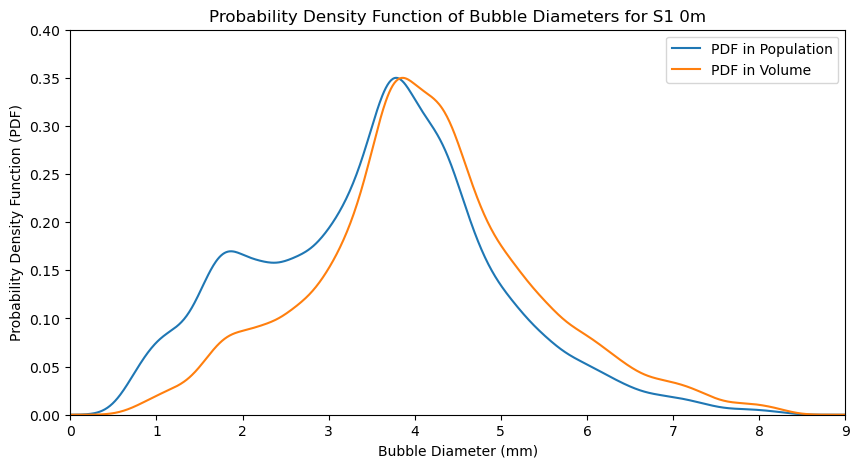

In [8]:
loaddata = globals()['S1_0m']

weight = 0.35

#  arrange
array = np.concatenate([diameter for sublist in loaddata for diameter in sublist])

all_bubble = array * 1000

# Calculate the kernel density estimate PDF
density = gaussian_kde(all_bubble)

# Generate finely spaced x-axis data for plotting
xs = np.linspace(0, 10, 1000)
xs_volume = np.linspace(0, 10, 1000)

pdf = density(xs)
pdf = pdf / pdf.max() * weight

pdf_volume = pdf * ( xs)
pdf_v = pdf_volume / pdf_volume.max() * weight

plt.figure(figsize=(10, 5))
#plt.scatter(all_bubble, density(all_bubble), alpha=0.6, label='PDF of Diameters', linewidths=0.1)  # 散点图显示实际气泡直径的PDF
plt.plot(xs, pdf, label='PDF in Population')  # KDE曲线
plt.plot(xs, pdf_v, label='PDF in Volume')
#plt.plot(xs, normal_pdf, label='Normal Distribution', linestyle='--')  
plt.title('Probability Density Function of Bubble Diameters for S1 0m')
plt.xlim(0, 9)
plt.ylim(0, weight + 0.05)
plt.xlabel('Bubble Diameter (mm)')
plt.ylabel('Probability Density Function (PDF)')
plt.legend()
plt.show()

## S1 - 2m

Index 762 is out of range for y_data.


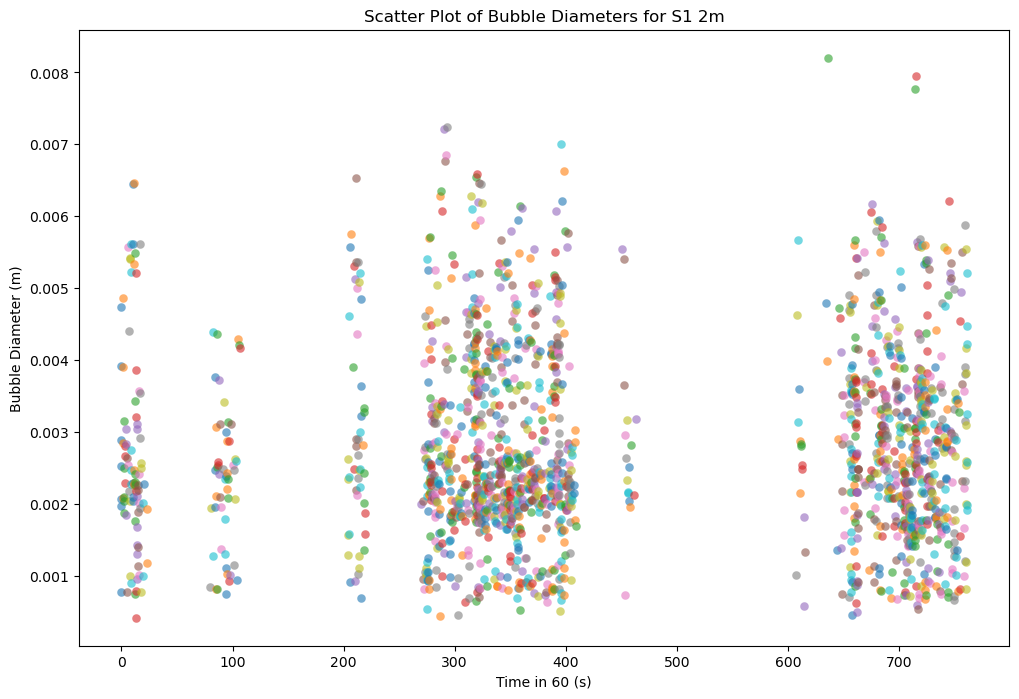

In [9]:
mat_contents = sio.loadmat('ShadowImage/Shadow-S1-2m/2024-05-24_01-55-33_Bubble_Info.mat')
bubble_diameter1= mat_contents['imgInfo']['bubble_diameter'].flatten()

mat_contents = sio.loadmat('ShadowImage/Shadow-S1-2m/2024-05-24_01-59-37_Bubble_Info.mat')
bubble_diameter2 = mat_contents['imgInfo']['bubble_diameter'].flatten()

# 准备x和y数据
x_data = []
y_data = []
for index, bubble_list in enumerate(bubble_diameter1):
    x_data.extend([index] * len(bubble_list))  # 对每个子列表，扩展x_data列表
    y_data.extend(bubble_list)  # 扩展y_data列表

plt.figure(figsize=(12, 8))
for i in x_data:
    try:
        x = np.full_like(y_data[i], i)  # 生成和y_data[i]一样大小的x数组
        plt.scatter(x, y_data[i], alpha=0.6, linewidths=0.1)  # alpha设置点的透明度
    except IndexError:
        print(f"Index {i} is out of range for y_data.")
        break

plt.title('Scatter Plot of Bubble Diameters for S1 2m')
plt.xlabel('Time in 60 (s)')
plt.ylabel('Bubble Diameter (m)')
plt.show()

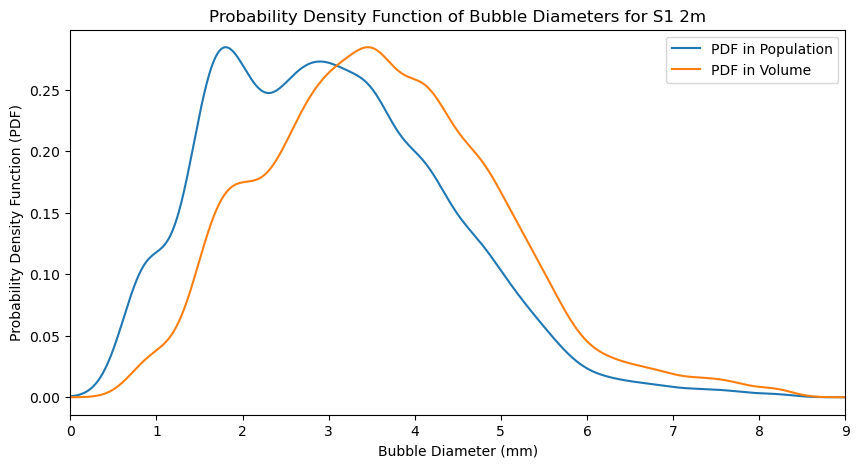

0.28472348523843355


In [10]:
loaddata = globals()['S1_2m']

#  arrange
array = np.concatenate([diameter for sublist in loaddata for diameter in sublist])

#array2 = np.concatenate(all_bubble2)
#array3 = np.concatenate(all_bubble3)

all_bubble = array * 1000

# Calculate the kernel density estimate PDF
density = gaussian_kde(all_bubble)

# Generate finely spaced x-axis data for plotting
xs = np.linspace(0, 10, 1000)
xs_volume = np.linspace(0, 10, 1000)

pdf = density(xs)
pdf_volume = pdf * ( xs)

# Normalization PDF
#pdf = pdf / pdf.max() * pdf.max()
pdf_v = pdf_volume / pdf_volume.max() * pdf.max()

plt.figure(figsize=(10, 5))
#plt.scatter(all_bubble, density(all_bubble), alpha=0.6, label='PDF of Diameters', linewidths=0.1)  # 散点图显示实际气泡直径的PDF
plt.plot(xs, pdf, label='PDF in Population')  # KDE曲线
plt.plot(xs, pdf_v, label='PDF in Volume')
#plt.plot(xs, normal_pdf, label='Normal Distribution', linestyle='--')  
plt.title('Probability Density Function of Bubble Diameters for S1 2m')
plt.xlim(0, 9)
#plt.ylim(0, weight + 0.05)
plt.xlabel('Bubble Diameter (mm)')
plt.ylabel('Probability Density Function (PDF)')
plt.legend()
plt.show()
print(pdf.max())

In [13]:
from scipy.stats import gaussian_kde, norm

#  arrange
all_bubble1 = [diameter for sublist in bubble1 for diameter in sublist]
all_bubble2 = [diameter for sublist in bubble2 for diameter in sublist]


array1 = np.concatenate(all_bubble1)
array2 = np.concatenate(all_bubble2)

all_bubble = np.concatenate([array1, array2])

# 使用gaussian_kde计算PDF
density = gaussian_kde(all_bubble)
density2 = gaussian_kde(array2)

# 生成一个细分的x轴数据，用于绘图
xs = np.linspace(all_bubble.min(), all_bubble.max(), 300)
pdf = density(xs)
pdf2 = density2(xs)

# 计算均值和标准差
mean_diameter = all_bubble.mean()
std_diameter = all_bubble.std()
normal_pdf = norm.pdf(xs, mean_diameter, std_diameter)  # 正态分布的PDF

# 绘制PDF图
plt.figure(figsize=(10, 5))
#plt.scatter(all_bubble, density(all_bubble), alpha=0.6, label='PDF of Diameters', linewidths=0.1)  # 散点图显示实际气泡直径的PDF
plt.plot(xs, pdf, label='KDE Curve')  # KDE曲线
plt.plot(xs, pdf2, label='KDE Curve2')  # KDE曲线
plt.plot(xs, normal_pdf, label='Normal Distribution', linestyle='--')  # 正态分布曲线
plt.title('Probability Density Function of Bubble Diameters for S1 2m')
plt.xlabel('Bubble Diameter')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

NameError: name 'bubble1' is not defined

## S1 - 5m

Index 741 is out of range for y_data.


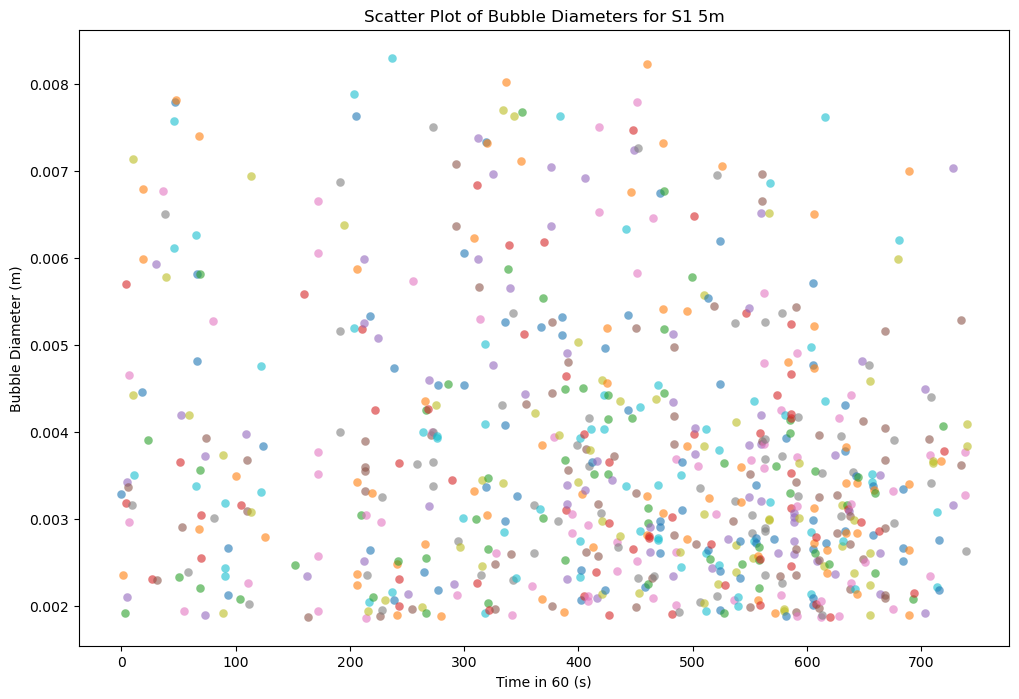

In [14]:
mat_contents = sio.loadmat('ShadowImage/Shadow-S1-5m/2024-05-24_02-10-43_Bubble_Info.mat')
bubble1= mat_contents['imgInfo']['bubble_diameter'].flatten()

mat_contents = sio.loadmat('ShadowImage/Shadow-S1-5m/2024-05-24_02-11-55_Bubble_Info.mat')
bubble2 = mat_contents['imgInfo']['bubble_diameter'].flatten()

all_bubble1 = [diameter for sublist in bubble1 for diameter in sublist]
all_bubble2 = [diameter for sublist in bubble2 for diameter in sublist]

# 准备x和y数据
x_data = []
y_data = []
for index, bubble_list in enumerate(bubble1):
    x_data.extend([index] * len(bubble_list))  # 对每个子列表，扩展x_data列表
    y_data.extend(bubble_list)  # 扩展y_data列表

plt.figure(figsize=(12, 8))
for i in x_data:
    try:
        x = np.full_like(y_data[i], i)  # 生成和y_data[i]一样大小的x数组
        plt.scatter(x, y_data[i], alpha=0.6, linewidths=0.1)  # alpha设置点的透明度
    except IndexError:
        print(f"Index {i} is out of range for y_data.")
        break

plt.title('Scatter Plot of Bubble Diameters for S1 5m')
plt.xlabel('Time in 60 (s)')
plt.ylabel('Bubble Diameter (m)')
plt.show()

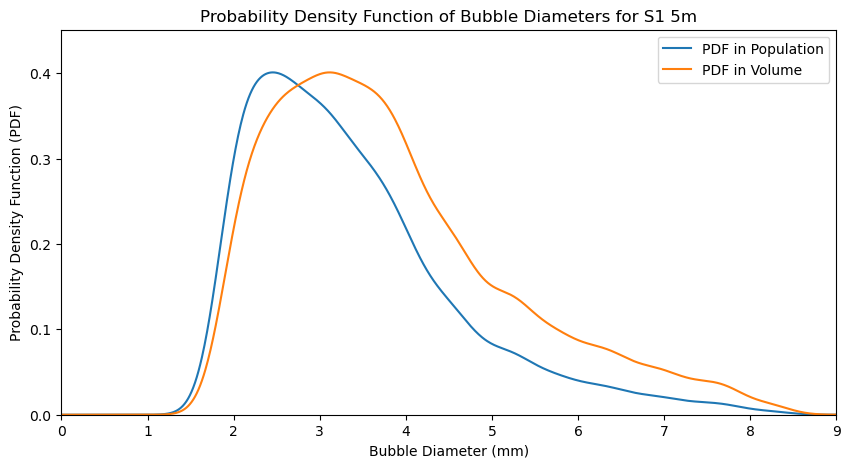

0.40112926987766967


In [15]:
loaddata = globals()['S1_5m']

#  arrange
array = np.zeros(0)
array = np.concatenate([diameter for sublist in loaddata for diameter in sublist])

#array2 = np.concatenate(all_bubble2)
#array3 = np.concatenate(all_bubble3)

all_bubble = array * 1000

# Calculate the kernel density estimate PDF
density = gaussian_kde(all_bubble)

# Generate finely spaced x-axis data for plotting
xs = np.linspace(0, 10, 1000)
xs_volume = np.linspace(0, 10, 1000)

pdf = density(xs)
pdf_volume = pdf * ( xs)

# Normalization PDF
#pdf = pdf / pdf.max() * pdf.max()
pdf_v = pdf_volume / pdf_volume.max() * pdf.max()

plt.figure(figsize=(10, 5))
#plt.scatter(all_bubble, density(all_bubble), alpha=0.6, label='PDF of Diameters', linewidths=0.1)  # 散点图显示实际气泡直径的PDF
plt.plot(xs, pdf, label='PDF in Population')  # KDE曲线
plt.plot(xs, pdf_v, label='PDF in Volume')
#plt.plot(xs, normal_pdf, label='Normal Distribution', linestyle='--')  
plt.title('Probability Density Function of Bubble Diameters for S1 5m')
plt.xlim(0, 9)
plt.ylim(0, pdf.max() + 0.05)
plt.xlabel('Bubble Diameter (mm)')
plt.ylabel('Probability Density Function (PDF)')
plt.legend()
plt.show()
print(pdf.max())

## S1 - 10m

Index 379 is out of range for y_data.


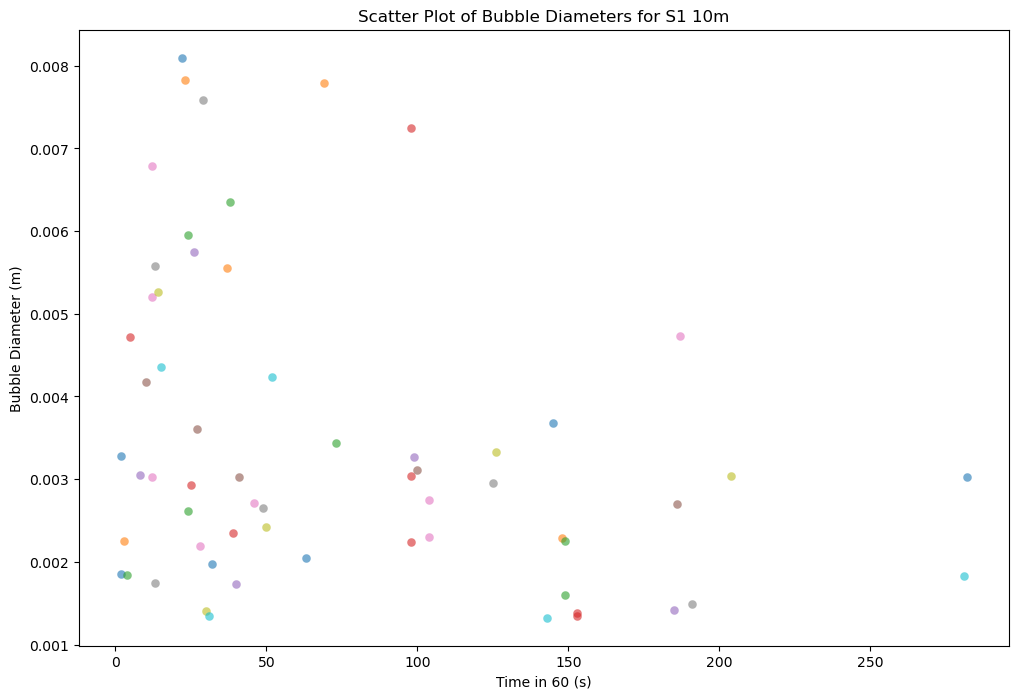

In [16]:
mat_contents = sio.loadmat('ShadowImage/Shadow-S1-10m/2024-05-24_02-28-28_Bubble_Info.mat')
bubble1= mat_contents['imgInfo']['bubble_diameter'].flatten()

mat_contents = sio.loadmat('ShadowImage/Shadow-S1-10m/2024-05-24_02-29-41_Bubble_Info.mat')
bubble2 = mat_contents['imgInfo']['bubble_diameter'].flatten()

all_bubble1 = [diameter for sublist in bubble1 for diameter in sublist]
all_bubble2 = [diameter for sublist in bubble2 for diameter in sublist]

# 准备x和y数据
x_data = []
y_data = []
for index, bubble_list in enumerate(bubble1):
    x_data.extend([index] * len(bubble_list))  # 对每个子列表，扩展x_data列表
    y_data.extend(bubble_list)  # 扩展y_data列表

plt.figure(figsize=(12, 8))
for i in x_data:
    try:
        x = np.full_like(y_data[i], i)  # 生成和y_data[i]一样大小的x数组
        plt.scatter(x, y_data[i], alpha=0.6, linewidths=0.1)  # alpha设置点的透明度
    except IndexError:
        print(f"Index {i} is out of range for y_data.")
        break

plt.title('Scatter Plot of Bubble Diameters for S1 10m')
plt.xlabel('Time in 60 (s)')
plt.ylabel('Bubble Diameter (m)')
plt.show()

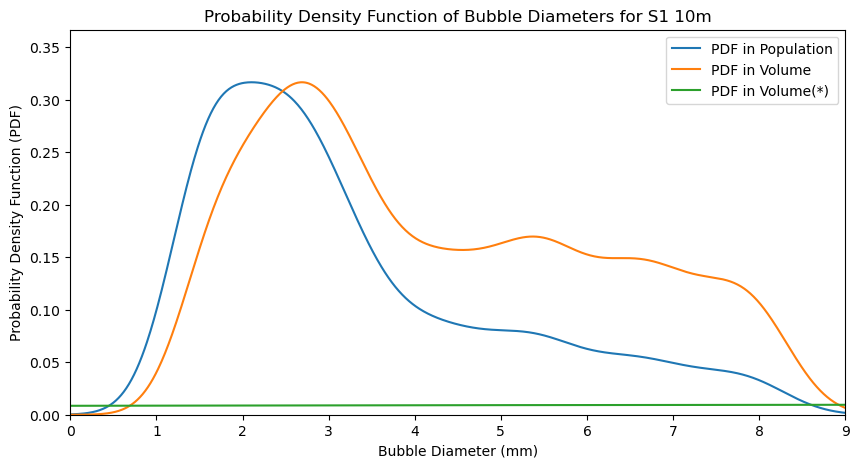

0.3164349567150811


In [17]:
loaddata = globals()['S1_10m']

#  arrange
array = np.zeros(0)
array = np.concatenate([diameter for sublist in loaddata for diameter in sublist])

#array2 = np.concatenate(all_bubble2)
#array3 = np.concatenate(all_bubble3)

all_bubble = array * 1000

# Calculate the kernel density estimate PDF
density = gaussian_kde(all_bubble)

all_volume = all_bubble**3

density_volume = gaussian_kde(all_volume)

# Generate finely spaced x-axis data for plotting
xs = np.linspace(0, 10, 1000)
xs_volume = np.linspace(0, 10, 1000)

pdf_V = density_volume(xs)

pdf = density(xs)
pdf_volume = pdf * ( xs)

# Normalization PDF
#pdf = pdf / pdf.max() * pdf.max()
pdf_v = pdf_volume / pdf_volume.max() * pdf.max()

plt.figure(figsize=(10, 5))
#plt.scatter(all_bubble, density(all_bubble), alpha=0.6, label='PDF of Diameters', linewidths=0.1)  # 散点图显示实际气泡直径的PDF
plt.plot(xs, pdf, label='PDF in Population')  # KDE曲线
plt.plot(xs, pdf_v, label='PDF in Volume')
plt.plot(xs, pdf_V, label='PDF in Volume(*)')
#plt.plot(xs, normal_pdf, label='Normal Distribution', linestyle='--')  
plt.title('Probability Density Function of Bubble Diameters for S1 10m')
plt.xlim(0, 9)
plt.ylim(0, pdf.max() + 0.05)
plt.xlabel('Bubble Diameter (mm)')
plt.ylabel('Probability Density Function (PDF)')
plt.legend()
plt.show()
print(pdf.max())

## S1 - 20m

Index 865 is out of range for y_data.


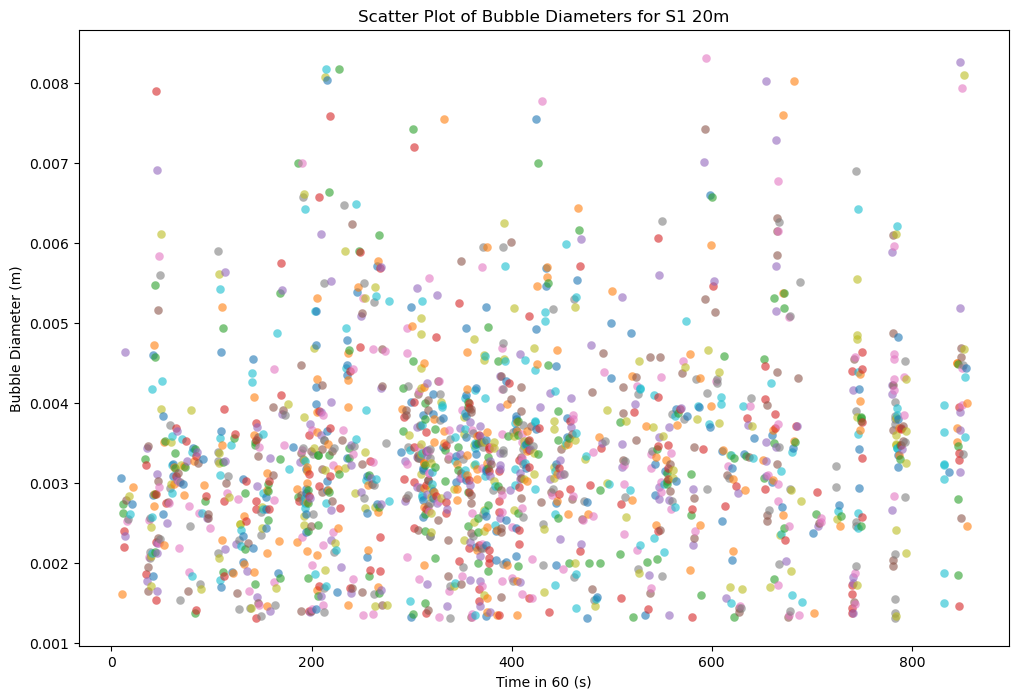

In [18]:
mat_contents = sio.loadmat('ShadowImage/Shadow-S1-20m/2024-05-24_03-03-56_Bubble_Info.mat')
bubble1= mat_contents['imgInfo']['bubble_diameter'].flatten()

mat_contents = sio.loadmat('ShadowImage/Shadow-S1-20m/2024-05-24_03-05-06_Bubble_Info.mat')
bubble2 = mat_contents['imgInfo']['bubble_diameter'].flatten()

all_bubble1 = [diameter for sublist in bubble1 for diameter in sublist]
all_bubble2 = [diameter for sublist in bubble2 for diameter in sublist]

# 准备x和y数据
x_data = []
y_data = []
for index, bubble_list in enumerate(bubble1):
    x_data.extend([index] * len(bubble_list))  # 对每个子列表，扩展x_data列表
    y_data.extend(bubble_list)  # 扩展y_data列表

plt.figure(figsize=(12, 8))
for i in x_data:
    try:
        x = np.full_like(y_data[i], i)  # 生成和y_data[i]一样大小的x数组
        plt.scatter(x, y_data[i], alpha=0.6, linewidths=0.1)  # alpha设置点的透明度
    except IndexError:
        print(f"Index {i} is out of range for y_data.")
        break

plt.title('Scatter Plot of Bubble Diameters for S1 20m')
plt.xlabel('Time in 60 (s)')
plt.ylabel('Bubble Diameter (m)')
plt.show()

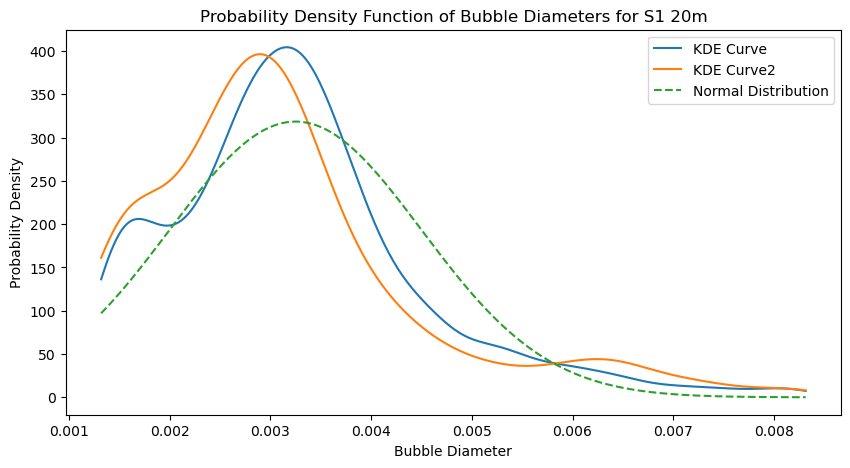

In [19]:
array1 = np.concatenate(all_bubble1)
array2 = np.concatenate(all_bubble2)

all_bubble = np.concatenate([array1, array2])

# 使用gaussian_kde计算PDF
density = gaussian_kde(all_bubble)
density2 = gaussian_kde(array2)

# 生成一个细分的x轴数据，用于绘图
xs = np.linspace(all_bubble.min(), all_bubble.max(), 300)
pdf = density(xs)
pdf2 = density2(xs)

# 计算均值和标准差
mean_diameter = all_bubble.mean()
std_diameter = all_bubble.std()
normal_pdf = norm.pdf(xs, mean_diameter, std_diameter)  # 正态分布的PDF

# 绘制PDF图
plt.figure(figsize=(10, 5))
#plt.scatter(all_bubble, density(all_bubble), alpha=0.6, label='PDF of Diameters', linewidths=0.1)  # 散点图显示实际气泡直径的PDF
plt.plot(xs, pdf, label='KDE Curve')  # KDE曲线
plt.plot(xs, pdf2, label='KDE Curve2')  # KDE曲线
plt.plot(xs, normal_pdf, label='Normal Distribution', linestyle='--')  # 正态分布曲线
plt.title('Probability Density Function of Bubble Diameters for S1 20m')
plt.xlabel('Bubble Diameter')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

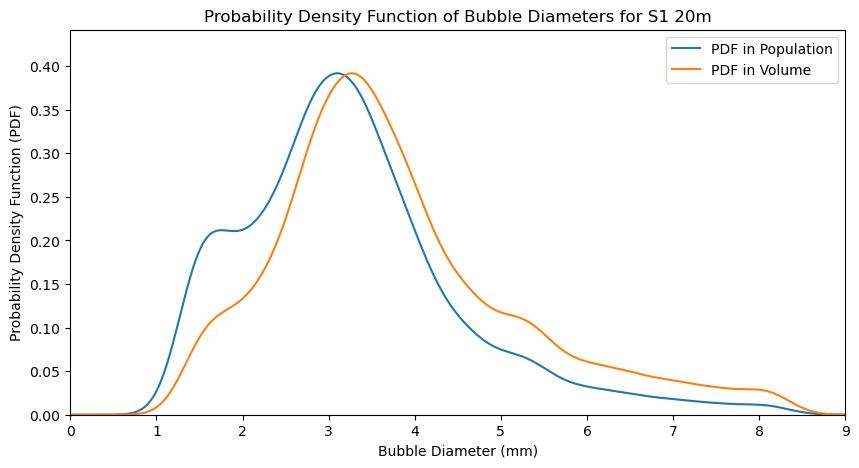

0.3917342231455955


In [20]:
loaddata = globals()['S1_20m']

#  arrange
array = np.zeros(0)
array = np.concatenate([diameter for sublist in loaddata for diameter in sublist])

#array2 = np.concatenate(all_bubble2)
#array3 = np.concatenate(all_bubble3)

all_bubble = array * 1000

# Calculate the kernel density estimate PDF
density = gaussian_kde(all_bubble)

# Generate finely spaced x-axis data for plotting
xs = np.linspace(0, 10, 1000)
xs_volume = np.linspace(0, 10, 1000)

pdf = density(xs)
pdf_volume = pdf * ( xs)

# Normalization PDF
#pdf = pdf / pdf.max() * pdf.max()
pdf_v = pdf_volume / pdf_volume.max() * pdf.max()

plt.figure(figsize=(10, 5))
#plt.scatter(all_bubble, density(all_bubble), alpha=0.6, label='PDF of Diameters', linewidths=0.1)  # 散点图显示实际气泡直径的PDF
plt.plot(xs, pdf, label='PDF in Population')  # KDE曲线
plt.plot(xs, pdf_v, label='PDF in Volume')
#plt.plot(xs, normal_pdf, label='Normal Distribution', linestyle='--')  
plt.title('Probability Density Function of Bubble Diameters for S1 20m')
plt.xlim(0, 9)
plt.ylim(0, pdf.max() + 0.05)
plt.xlabel('Bubble Diameter (mm)')
plt.ylabel('Probability Density Function (PDF)')
plt.legend()
plt.show()
print(pdf.max())

## Summerize Distribution PDF - Different level

Global Log-Normal Distribution Parameters: Mean=1.1218049674466082, Std=0.46251270077330653


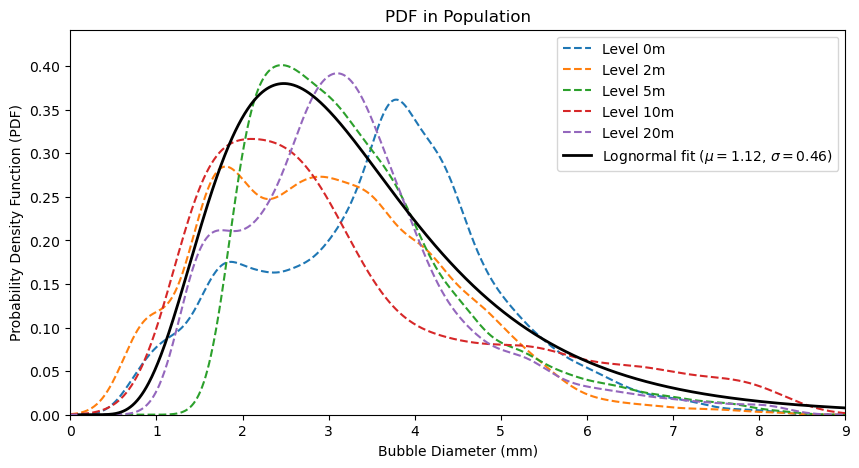

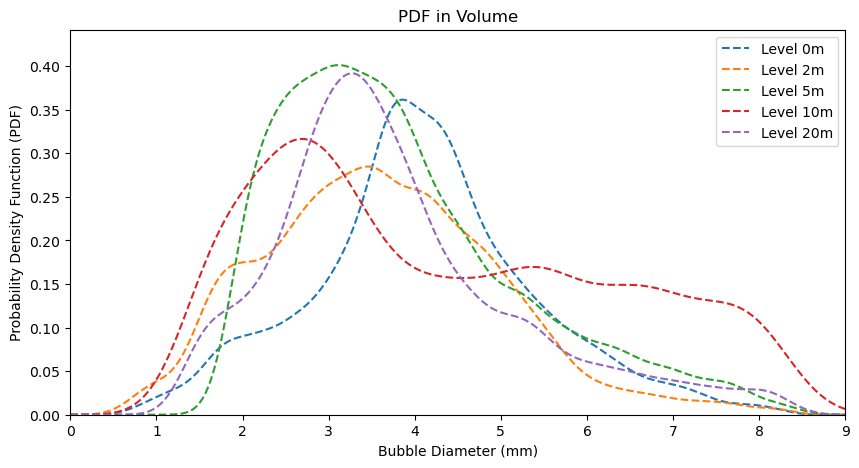

In [21]:
from scipy.stats import gaussian_kde, lognorm

fig1, ax1 = plt.subplots(figsize=(10, 5))
fig2, ax2 = plt.subplots(figsize=(10, 5))
all_data = []

# Collect all data points and transform to logarithm
for level in levels:
    load_data = globals()[f"S1_{level}"]
    all_bubble = np.concatenate([diameter for sublist in load_data for diameter in sublist]) * 1000
    all_data.extend(np.log(all_bubble))  # Log transformation

# Calculate global parameters for the log-normal distribution
log_mean = np.mean(all_data)
log_std = np.std(all_data)
print(f"Global Log-Normal Distribution Parameters: Mean={log_mean}, Std={log_std}")

# Create a range for the x-axis
xsL = np.linspace(0.1, 9, 1000)  # Start from 0.1 to avoid log(0)

# Calculate the global log-normal PDF using the parameters of the log data
scale = np.exp(log_mean)
s = log_std
pdf_lognorm = lognorm.pdf(xsL, s, scale=scale)

# Normalize the global log-normal PDF for better visualization
pdf_lognorm /= pdf_lognorm.max()

for level in levels:

    loaddata = globals()[f"S1_{level}"]

    array = np.zeros(0)
    array = np.concatenate([diameter for sublist in loaddata for diameter in sublist])

    all_bubble = array * 1000

    # Calculate the kernel density estimate PDF
    density = gaussian_kde(all_bubble)

    # Generate finely spaced x-axis data for plotting
    xs = np.linspace(0, 10, 1000)
    xs_volume = np.linspace(0, 10, 1000)

    pdf = density(xs)
    pdf_volume = pdf * (xs)

    # Normalization PDF
    #pdf = pdf / pdf.max() * pdf.max()
    pdf_v = pdf_volume / pdf_volume.max() * pdf.max()

    ax1.plot(xs, pdf, label=f'Level {level}', linestyle='--') # Label each line with its level
    ax2.plot(xs_volume, pdf_v, label=f'Level {level}', linestyle='--') # Label each line with its level


# Plot the global normal distribution fit
ax1.plot(xsL, pdf_lognorm * 0.38, 'black', label=f'Lognormal fit ($\mu = {log_mean:.2f}$, $\sigma = {log_std:.2f}$)', linewidth=2)
#ax2.plot(xsL, pdf_lognorm*xs/xs.max(), 'black', label='Global Normal Fit Volume', linewidth=2)


# Set chart details for the first figure
ax1.set_title('PDF in Population')
ax1.set_xlim(0, 9)
ax1.set_ylim(0, np.max(pdf) + 0.05)
ax1.set_xlabel('Bubble Diameter (mm)')
ax1.set_ylabel('Probability Density Function (PDF)')
ax1.legend()


# Set chart details for the second figure
ax2.set_title('PDF in Volume')
ax2.set_xlim(0, 9)
ax2.set_ylim(0, np.max(pdf_v) + 0.05)
ax2.set_xlabel('Bubble Diameter (mm)')
ax2.set_ylabel('Probability Density Function (PDF)')
ax2.legend()


## S2 - 0m

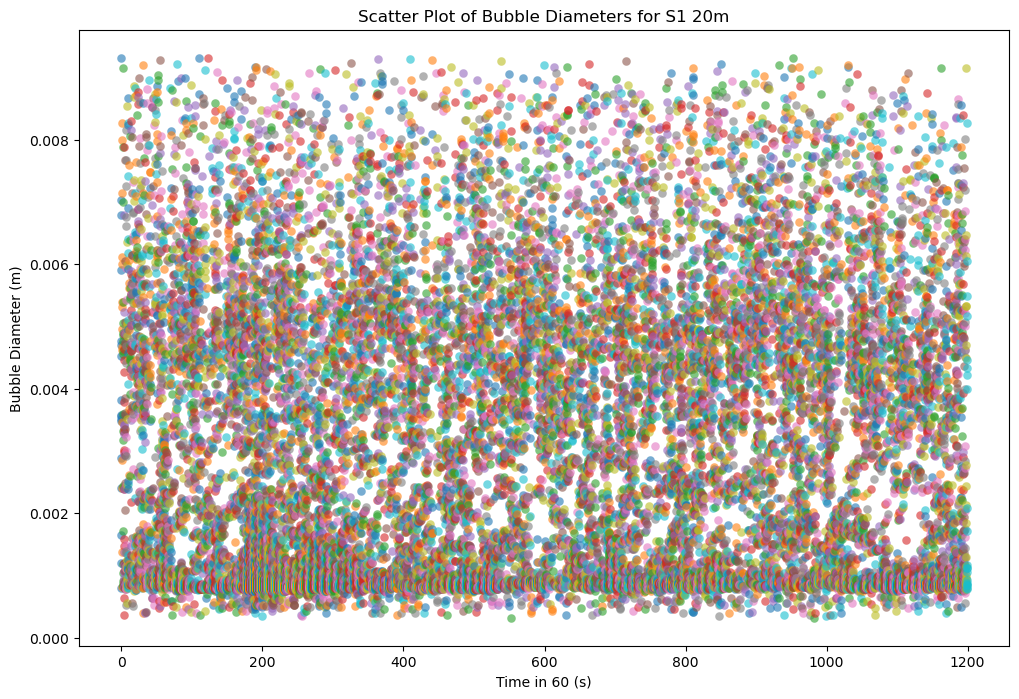

In [25]:
mat_contents = sio.loadmat('ShadowImage/Shadow-S2C-0m/2024-05-24_04-17-06_Bubble_Info.mat')
bubble1= mat_contents['imgInfo']['bubble_diameter'].flatten()

mat_contents = sio.loadmat('ShadowImage/Shadow-S2C-0m/2024-05-24_04-20-16_Bubble_Info.mat')
bubble2 = mat_contents['imgInfo']['bubble_diameter'].flatten()

all_bubble1 = [diameter for sublist in bubble1 for diameter in sublist]
all_bubble2 = [diameter for sublist in bubble2 for diameter in sublist]

# 准备x和y数据
x_data = []
y_data = []
for index, bubble_list in enumerate(bubble1):
    x_data.extend([index] * len(bubble_list))  # 对每个子列表，扩展x_data列表
    y_data.extend(bubble_list)  # 扩展y_data列表

plt.figure(figsize=(12, 8))
for i in x_data:
    try:
        x = np.full_like(y_data[i], i)  # 生成和y_data[i]一样大小的x数组
        plt.scatter(x, y_data[i], alpha=0.6, linewidths=0.1)  # alpha设置点的透明度
    except IndexError:
        print(f"Index {i} is out of range for y_data.")
        break

plt.title('Scatter Plot of Bubble Diameters for S1 20m')
plt.xlabel('Time in 60 (s)')
plt.ylabel('Bubble Diameter (m)')
plt.show()

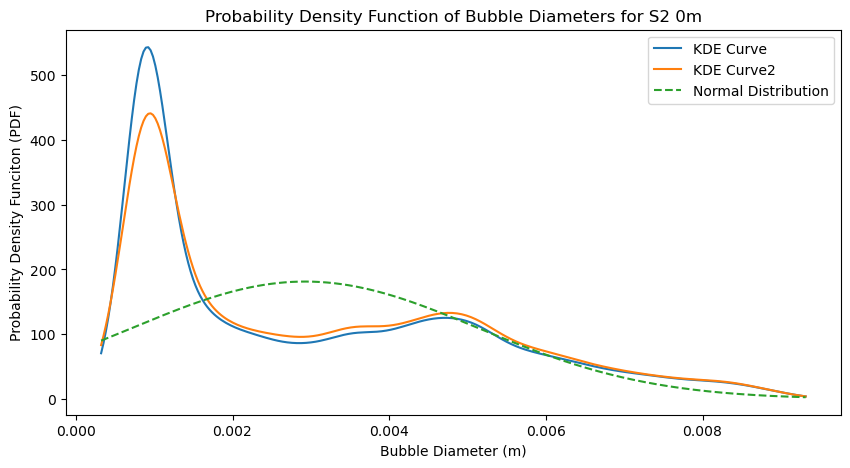

In [26]:
array1 = np.concatenate(all_bubble1)
array2 = np.concatenate(all_bubble2)

all_bubble = np.concatenate([array1, array2])

# 使用gaussian_kde计算PDF
density = gaussian_kde(all_bubble)
density2 = gaussian_kde(array2)

# 生成一个细分的x轴数据，用于绘图
xsS2 = np.linspace(all_bubble.min(), all_bubble.max(), 300)
pdfS2 = density(xsS2)
pdf2S2 = density2(xsS2)

# 计算均值和标准差
mean_diameter = all_bubble.mean()
std_diameter = all_bubble.std()
normal_pdfS2 = norm.pdf(xsS2, mean_diameter, std_diameter)  # 正态分布的PDF

# 绘制PDF图
plt.figure(figsize=(10, 5))
#plt.scatter(all_bubble, density(all_bubble), alpha=0.6, label='PDF of Diameters', linewidths=0.1)  # 散点图显示实际气泡直径的PDF
plt.plot(xsS2, pdfS2, label='KDE Curve')  # KDE曲线
plt.plot(xsS2, pdf2S2, label='KDE Curve2')  # KDE曲线
plt.plot(xsS2, normal_pdfS2, label='Normal Distribution', linestyle='--')  # 正态分布曲线
plt.title('Probability Density Function of Bubble Diameters for S2 0m')
plt.xlabel('Bubble Diameter (m)')
plt.ylabel('Probability Density Funciton (PDF)')
plt.legend()
plt.show()

## S3 - 0m

Index 191 is out of range for y_data.


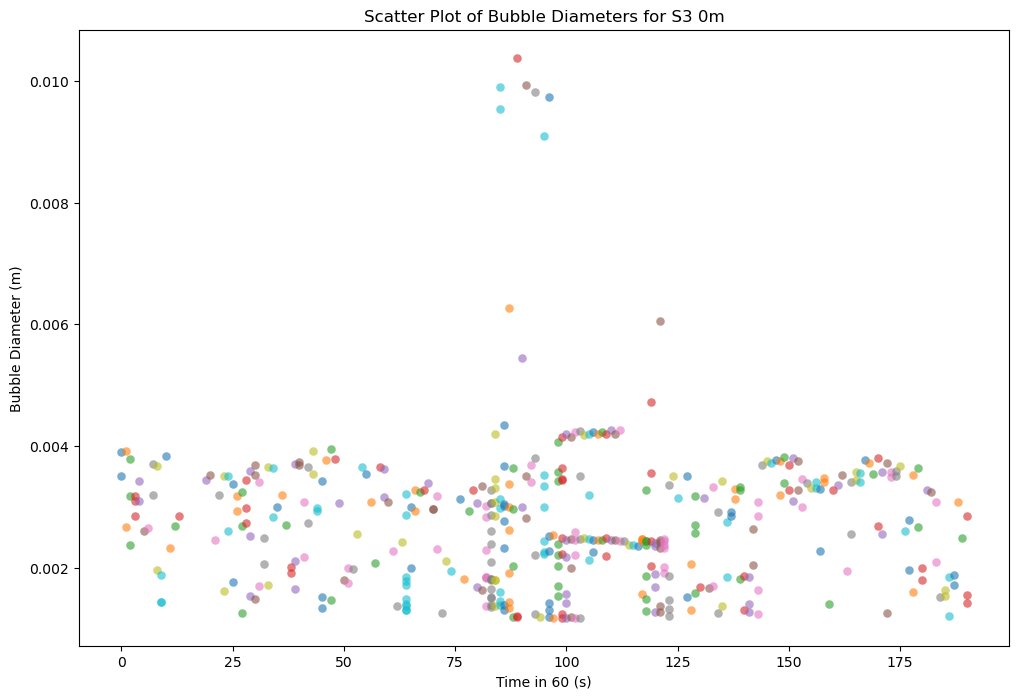

In [27]:
mat_contents = sio.loadmat('ShadowImage/Shadow-S3-0m/2024-05-24_05-09-02_Bubble_Info.mat')
bubble1= mat_contents['imgInfo']['bubble_diameter'].flatten()

mat_contents = sio.loadmat('ShadowImage/Shadow-S3-0m/2024-05-24_05-12-58_Bubble_Info.mat')
bubble2 = mat_contents['imgInfo']['bubble_diameter'].flatten()

all_bubble1 = [diameter for sublist in bubble1 for diameter in sublist]
all_bubble2 = [diameter for sublist in bubble2 for diameter in sublist]

# 准备x和y数据
x_data = []
y_data = []
for index, bubble_list in enumerate(bubble1):
    x_data.extend([index] * len(bubble_list))  # 对每个子列表，扩展x_data列表
    y_data.extend(bubble_list)  # 扩展y_data列表

plt.figure(figsize=(12, 8))
for i in x_data:
    try:
        x = np.full_like(y_data[i], i)  # 生成和y_data[i]一样大小的x数组
        plt.scatter(x, y_data[i], alpha=0.6, linewidths=0.1)  # alpha设置点的透明度
    except IndexError:
        print(f"Index {i} is out of range for y_data.")
        break

plt.title('Scatter Plot of Bubble Diameters for S3 0m')
plt.xlabel('Time in 60 (s)')
plt.ylabel('Bubble Diameter (m)')
plt.show()

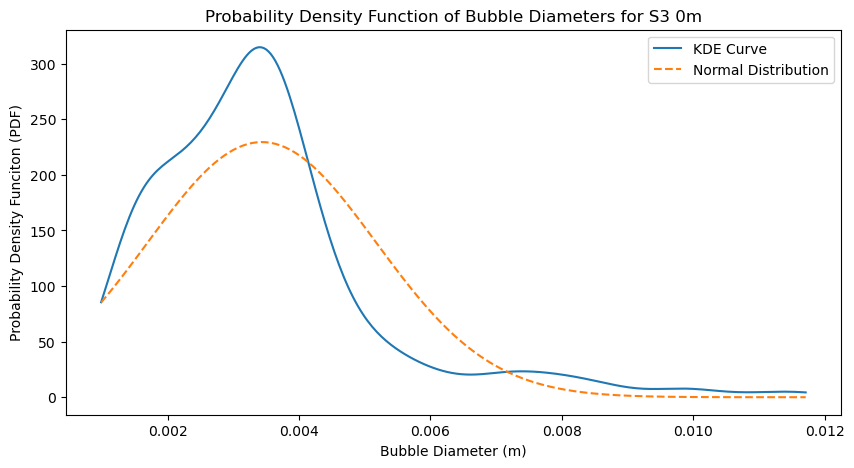

In [28]:
array1 = np.concatenate(all_bubble1)
array2 = np.concatenate(all_bubble2)

all_bubble = np.concatenate([array1, array2])

density = gaussian_kde(all_bubble)
#density2 = gaussian_kde(array2)

xsS3 = np.linspace(all_bubble.min(), all_bubble.max(), 300)
pdfS3 = density(xsS3)
#pdf2S3 = density2(xsS3)

# Calculating the mean and standard deviation
mean_diameter = all_bubble.mean()
std_diameter = all_bubble.std()
normal_pdfS3 = norm.pdf(xsS3, mean_diameter, std_diameter)  # Density of normal distribution

# draw the PDF
plt.figure(figsize=(10, 5))
#plt.scatter(all_bubble, density(all_bubble), alpha=0.6, label='PDF of Diameters', linewidths=0.1)  # density of actual bubble diameters
plt.plot(xsS3, pdfS3, label='KDE Curve')  # kde curve
#plt.plot(xsS3, pdf2S3, label='KDE Curve2')  
plt.plot(xsS3, normal_pdfS3, label='Normal Distribution', linestyle='--')  
plt.title('Probability Density Function of Bubble Diameters for S3 0m')
plt.xlabel('Bubble Diameter (m)')
plt.ylabel('Probability Density Funciton (PDF)')
plt.legend()
plt.show()

This is the Seep 3 data that has been classification manually

In [29]:
import os
import scipy.io as sio
import numpy as np


base_dir = "C:/RR2405/ShadowImage/Results/Shadow-S3-0m/2024-05-24_05-11-19"

# List to store all bubble diameters
all_bubble_diameters = []

for i in range(1, 11):  # Loop through numbers 1 to 10
    folder_name = f"bubble_in_chain_{i}"  # Construct folder name
    path = os.path.join(base_dir, folder_name, 'Bubble_Info.mat')  # Full path to the .mat file
    
    # Check if the file exists
    if os.path.exists(path):
        # Load data from the MAT file
        mat_contents = sio.loadmat(path)
        
        # Extract bubble diameter, assuming the structure is similar to your example
        bubble_diameter = mat_contents['imgInfo']['bubble_diameter'].flatten()
        
        # Flatten the list of lists if necessary and extend to the main list
        all_bubble_diameters.extend([diameter for sublist in bubble_diameter for diameter in sublist])
    else:
        print(f"File not found: {path}")


all_bubble = np.concatenate(all_bubble_diameters)

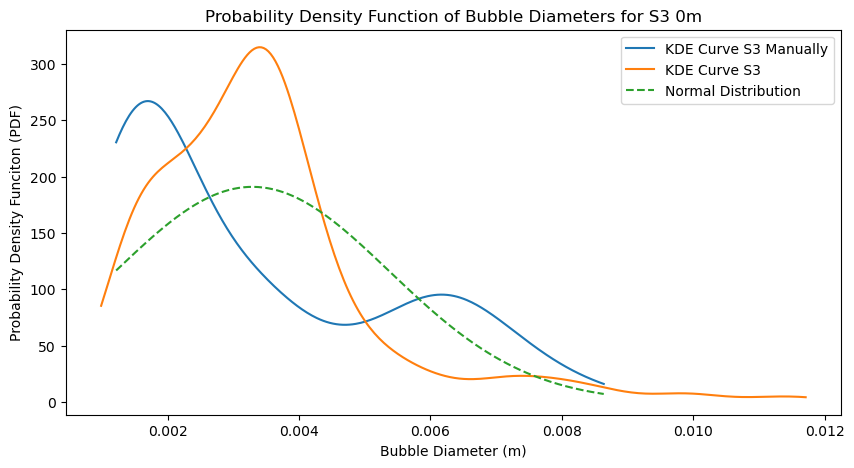

In [30]:
from scipy.stats import gaussian_kde, norm

density = gaussian_kde(all_bubble)
#density2 = gaussian_kde(array2)

xsS3M = np.linspace(all_bubble.min(), all_bubble.max(), 300)
pdfS3M = density(xsS3M)
#pdf2S3 = density2(xsS3)

# Calculating the mean and standard deviation
mean_diameter = all_bubble.mean()
std_diameter = all_bubble.std()
normal_pdfS3M = norm.pdf(xsS3M, mean_diameter, std_diameter)  # Density of normal distribution

# draw the PDF
plt.figure(figsize=(10, 5))
#plt.scatter(all_bubble, density(all_bubble), alpha=0.6, label='PDF of Diameters', linewidths=0.1)  # density of actual bubble diameters
plt.plot(xsS3M, pdfS3M, label='KDE Curve S3 Manually')  # kde curve
plt.plot(xsS3, pdfS3, label='KDE Curve S3')  
plt.plot(xsS3M, normal_pdfS3M, label='Normal Distribution', linestyle='--')  
plt.title('Probability Density Function of Bubble Diameters for S3 0m')
plt.xlabel('Bubble Diameter (m)')
plt.ylabel('Probability Density Funciton (PDF)')
plt.legend()
plt.show()

NameError: name 'xsS1' is not defined

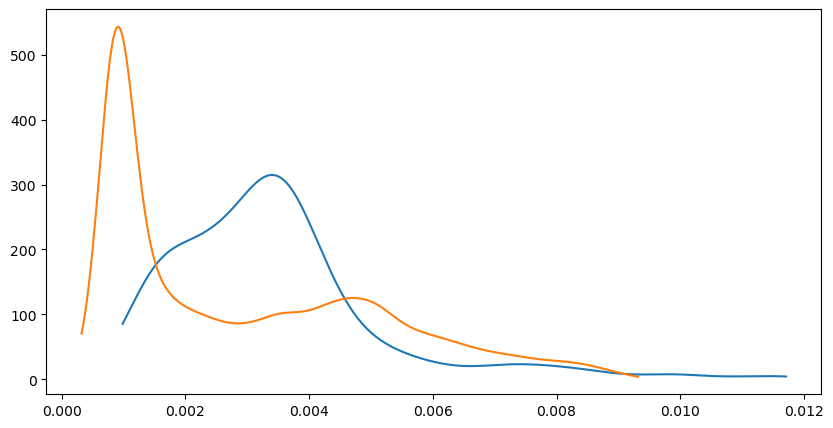

In [31]:

plt.figure(figsize=(10, 5))
#plt.scatter(all_bubble, density(all_bubble), alpha=0.6, label='PDF of Diameters', linewidths=0.1)  # 散点图显示实际气泡直径的PDF
plt.plot(xsS3, pdfS3, label='KDE Curve S3')  # KDE曲线

plt.plot(xsS2, pdfS2, label='KDE Curve S2')  # KDE曲线

plt.plot(xsS1, pdfS1, label='KDE Curve S1')  # KDE曲线

#plt.plot(xsS3, pdf2S3, label='KDE Curve2')  # KDE曲线
#plt.plot(xsS3, normal_pdfS3, label='Normal Distribution', linestyle='--')  # 正态分布曲线
plt.title('Probability Density Function of Bubble Diameters for S2 0m')
plt.xlabel('Bubble Diameter (m)')
plt.ylabel('Probability Density Funciton (PDF)')
plt.legend()
plt.show()

## Summerize Distribution PDF - Different Seep

Global Log-Normal Distribution Parameters: Mean=0.9224484106152601, Std=0.7410320132791383


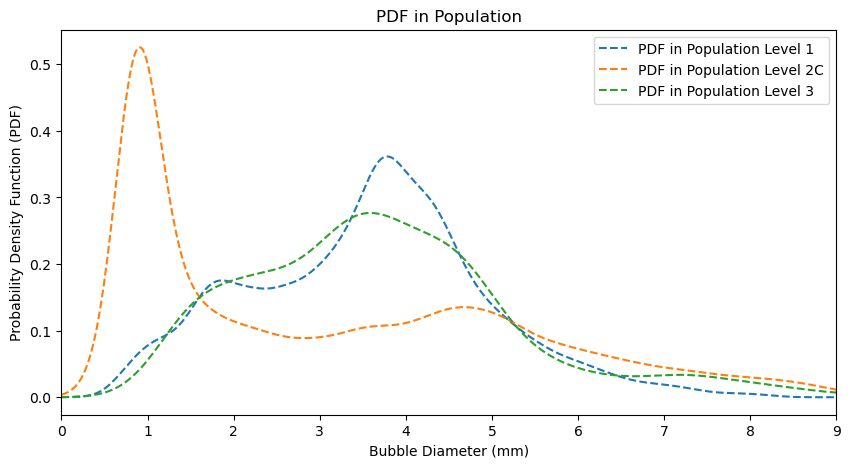

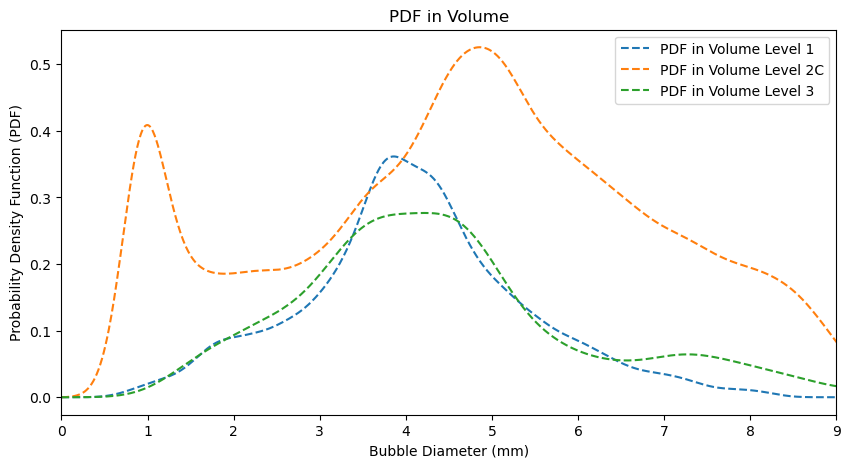

In [32]:
from scipy.stats import gaussian_kde, lognorm

fig1, ax1 = plt.subplots(figsize=(10, 5))
fig2, ax2 = plt.subplots(figsize=(10, 5))
all_data = []

# Collect all data points and transform to logarithm
for seep in seepname:
    load_data = globals()[f"S{seep}_0m"]
    all_bubble = np.concatenate([diameter for sublist in load_data for diameter in sublist]) * 1000
    all_data.extend(np.log(all_bubble))  # Log transformation

# Calculate global parameters for the log-normal distribution
log_mean = np.mean(all_data)
log_std = np.std(all_data)
print(f"Global Log-Normal Distribution Parameters: Mean={log_mean}, Std={log_std}")

# Create a range for the x-axis
xsL = np.linspace(0.1, 9, 1000)  # Start from 0.1 to avoid log(0)

# Calculate the global log-normal PDF using the parameters of the log data
scale = np.exp(log_mean)
s = log_std
pdf_lognorm = lognorm.pdf(xs, s, scale=scale)

# Normalize the global log-normal PDF for better visualization
pdf_lognorm /= pdf_lognorm.max()

for seep in seepname:

    loaddata = globals()[f"S{seep}_0m"]

    array = np.zeros(0)
    array = np.concatenate([diameter for sublist in loaddata for diameter in sublist])

    all_bubble = array * 1000

    # Calculate the kernel density estimate PDF
    density = gaussian_kde(all_bubble)
    
    # Generate finely spaced x-axis data for plotting
    xs = np.linspace(0, 10, 1000)
    xs_volume = np.linspace(0, 10, 1000)

    pdf = density(xs)
    pdf_volume = pdf * (xs)

    # Normalization PDF
    #pdf = pdf / pdf.max() * pdf.max()
    pdf_v = pdf_volume / pdf_volume.max() * pdf.max()

    ax1.plot(xs, pdf, label=f'PDF in Population Level {seep}', linestyle='--') # Label each line with its level
    ax2.plot(xs_volume, pdf_v, label=f'PDF in Volume Level {seep}', linestyle='--') # Label each line with its level


# Plot the global normal distribution fit
#ax1.plot(xsL, pdf_lognorm * 0.35, 'black', label=f'Lognormal fit ($\mu = {log_mean:.2f}$, $\sigma = {log_std:.2f}$)', linewidth=2)
#ax2.plot(xsL, pdf_lognorm*xs/xs.max(), 'black', label='Global Normal Fit Volume', linewidth=2)


# Set chart details for the first figure
ax1.set_title('PDF in Population')
ax1.set_xlim(0, 9)
#ax1.set_ylim(0, np.max(pdf) + 0.05)
ax1.set_xlabel('Bubble Diameter (mm)')
ax1.set_ylabel('Probability Density Function (PDF)')
ax1.legend()


# Set chart details for the second figure
ax2.set_title('PDF in Volume')
ax2.set_xlim(0, 9)
#ax2.set_ylim(0, np.max(pdf_v) + 0.05)
ax2.set_xlabel('Bubble Diameter (mm)')
ax2.set_ylabel('Probability Density Function (PDF)')
ax2.legend()
